# This notebook is dedicated to the plotting of the different results

In [15]:
import numpy                as np
import matplotlib.pyplot    as plt
import pandas as pd
import seaborn              as sns
import pickle
from scipy.stats import norm
from matplotlib.pyplot import figure
from utils_plot_errors import *
from utils_calib import *
from bayes_alpha import *
from toy_pb import *

In [22]:
seed_x = 123456 #indicates which design $x_j$ to work with
sigma = [0.1,0.05] #Standard deviation of the observation noise for each output variable
nb_exp = 5
true_values = pd.DataFrame(np.concatenate([[func(xx+0.4, np.array([0.5,0.5]), kk,False) for xx in np.linspace(0,1,7)[1:-1]] for kk in range(1,3)], axis=1))
true_values.columns = ["Y1", "Y2"]
np.random.seed(45)
results_measures = true_values + np.random.normal(size = (nb_exp,2))*sigma
pre_path = f"toy_pb/"
variable_names = [r"$\lambda_1$", r"$\lambda_2$"] #names of the three outputs
nb_outputs = 2

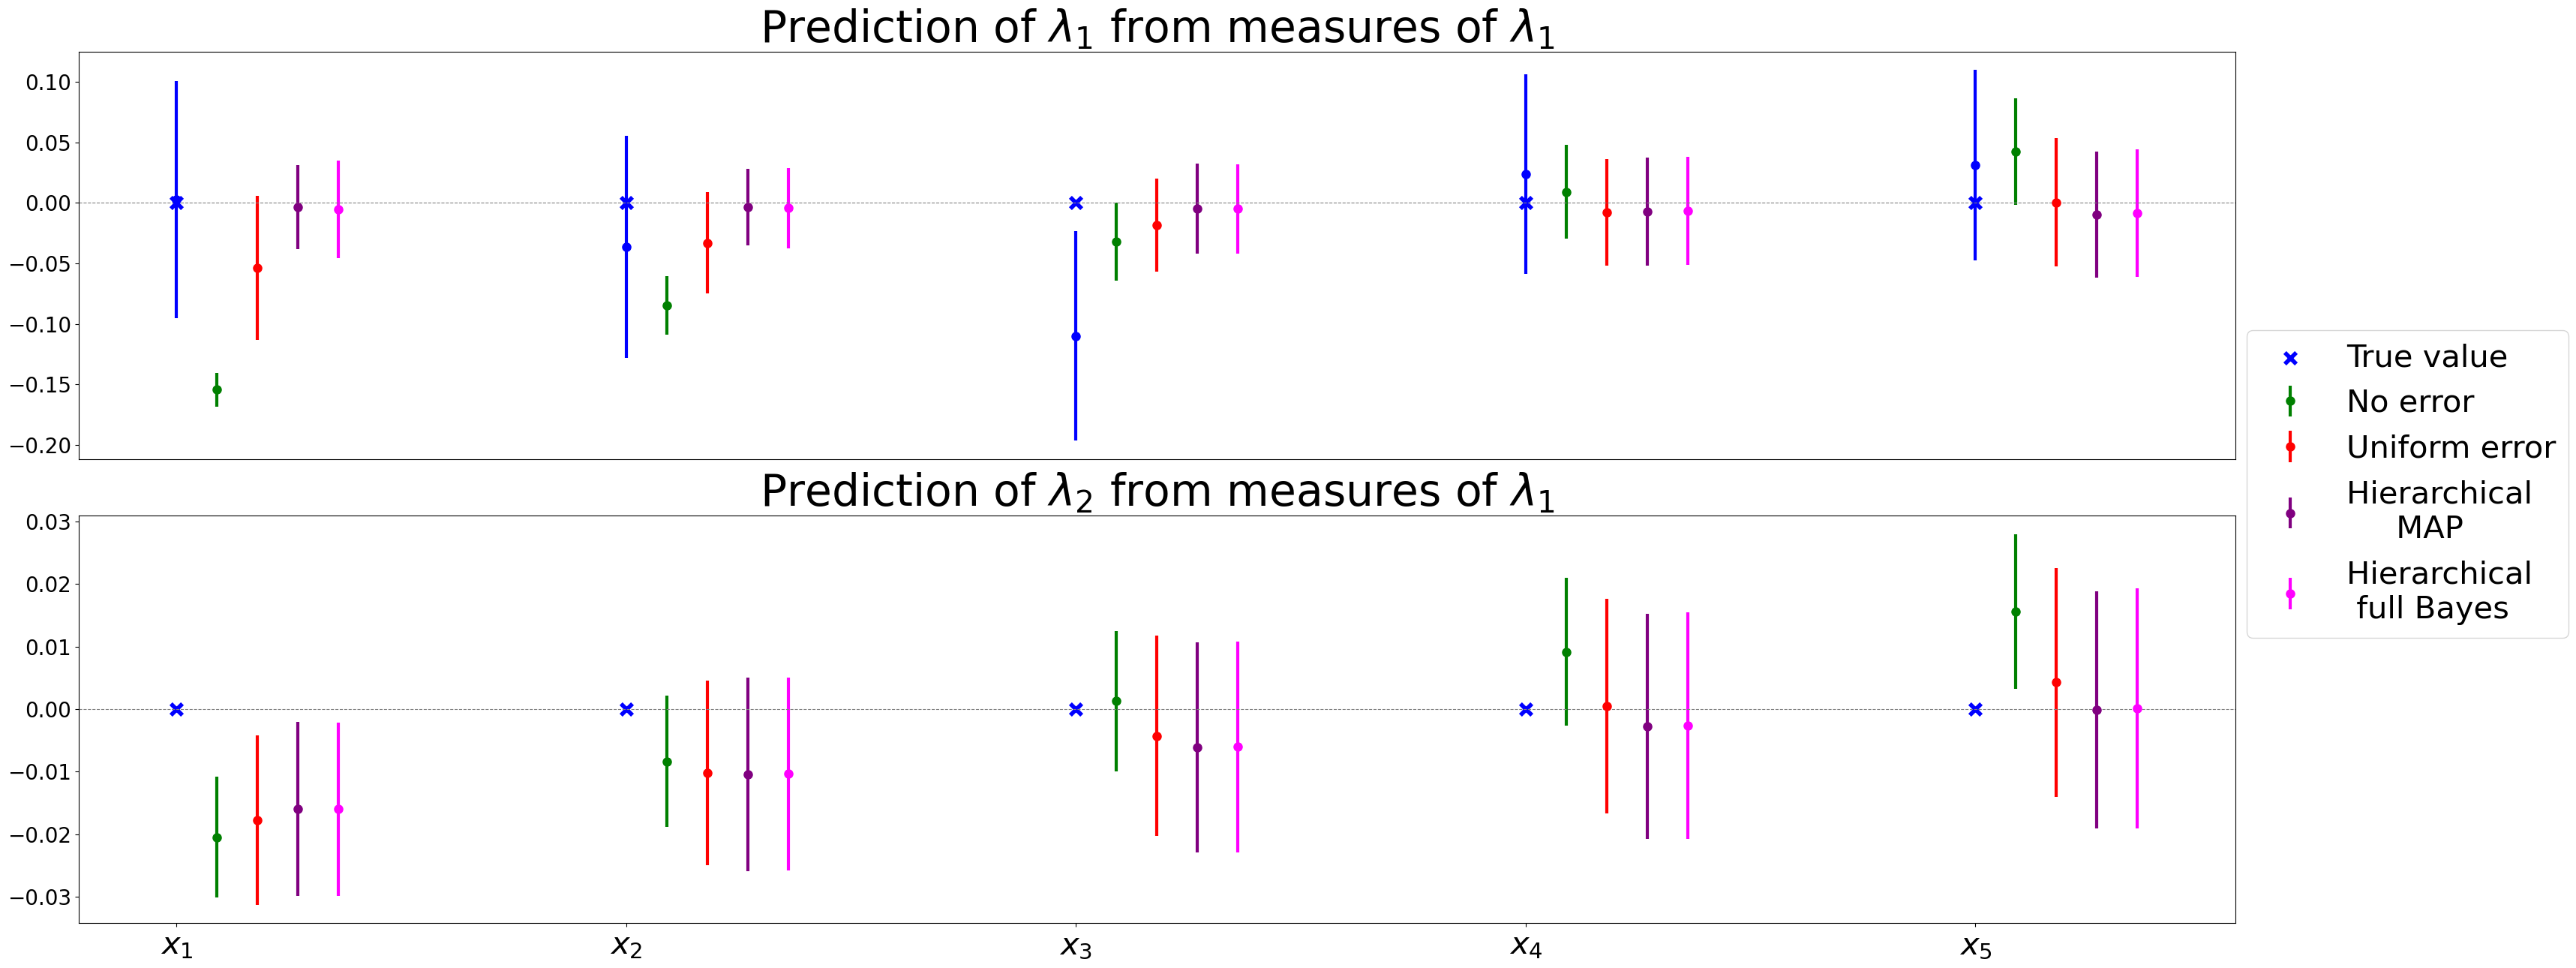

In [19]:
plot_mean_std(index_calib = 1, results_measures = results_measures, true_values = true_values, sigma = sigma, pre_path = pre_path, variable_names = variable_names, no_error = True, unif_error = True, hierarchical_map = True, full_bayes = True, embed = False, savefig = True) 

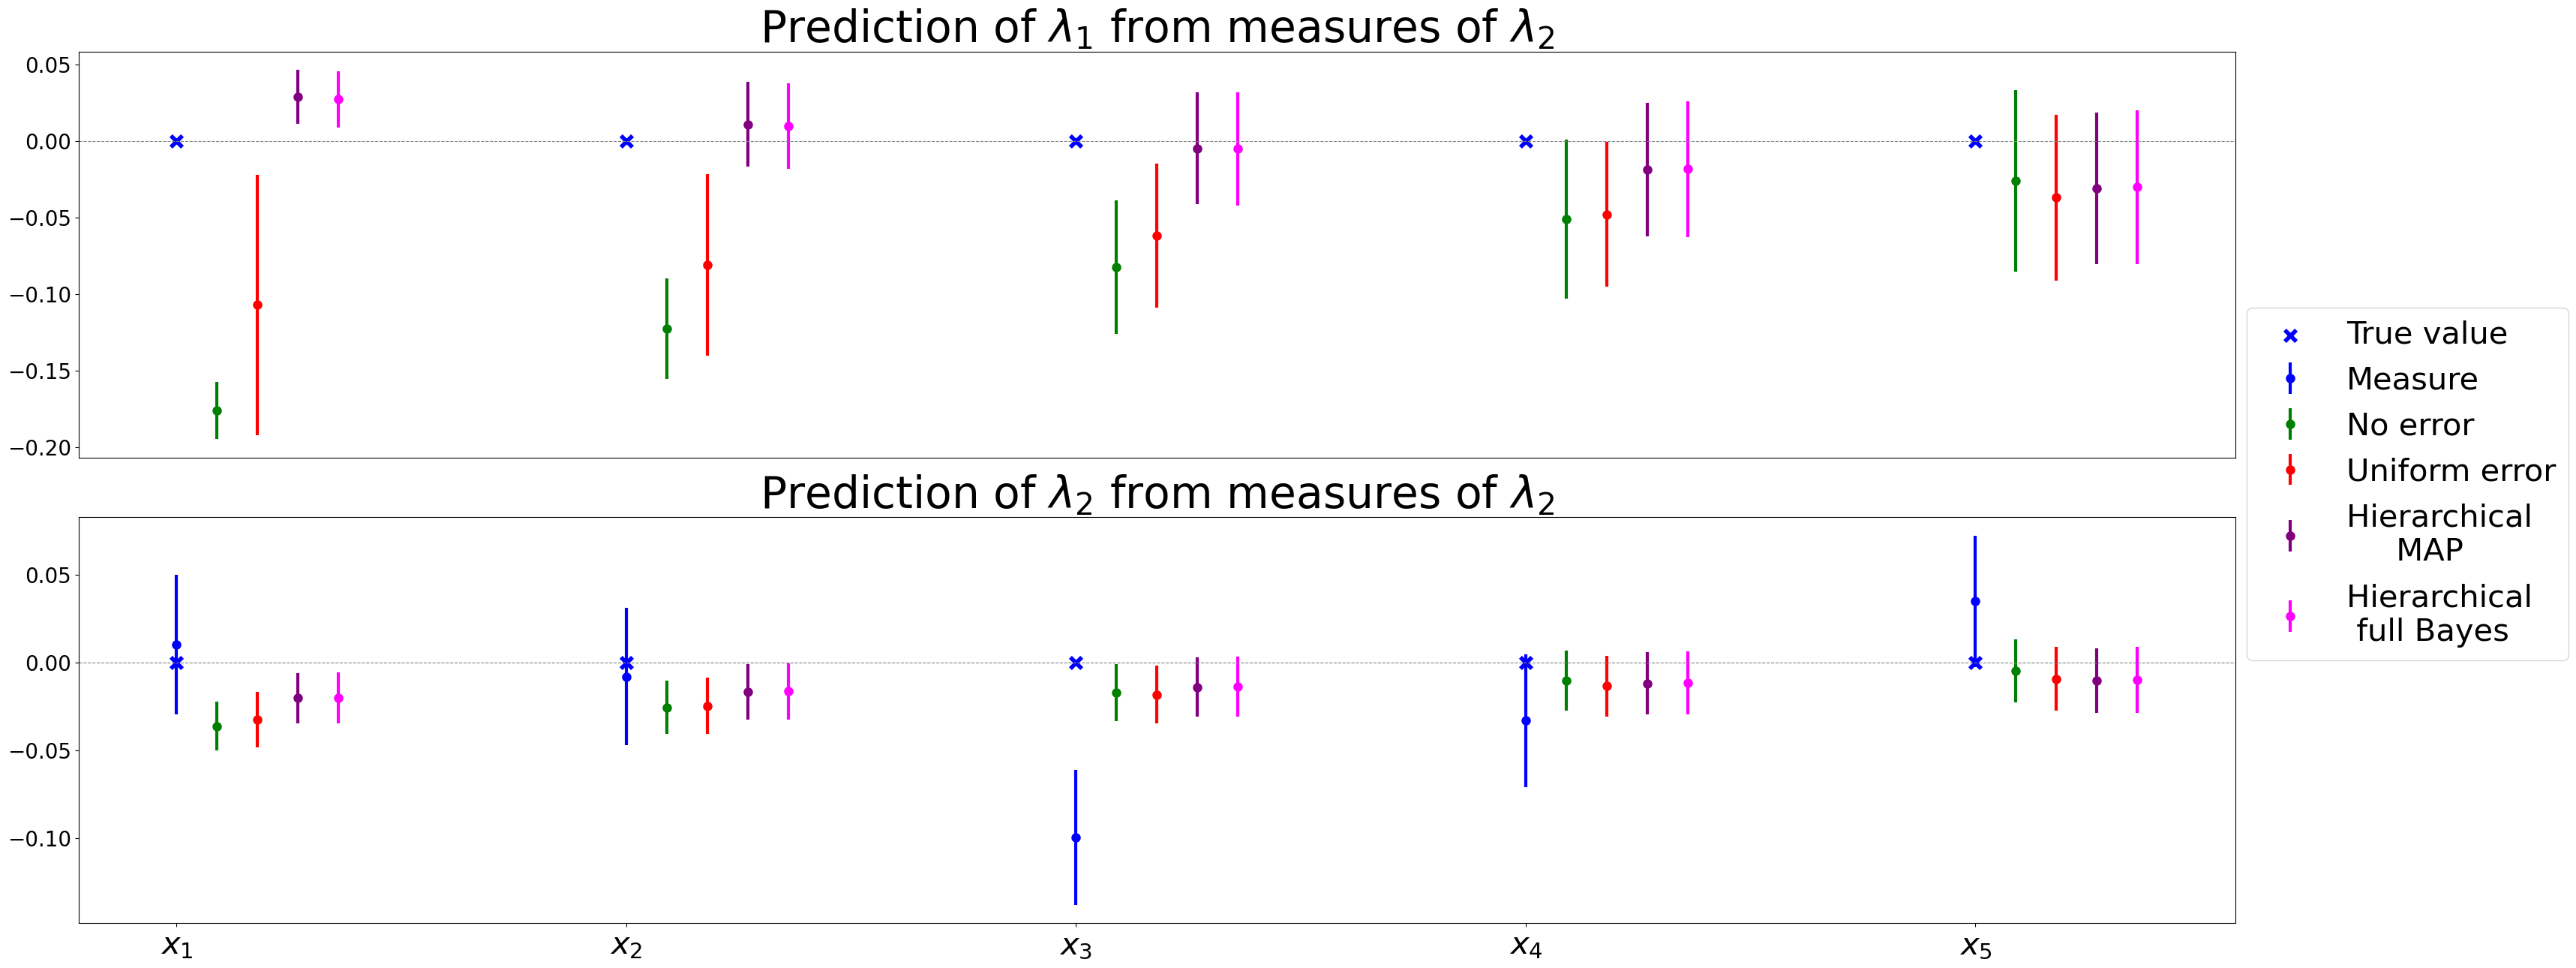

In [20]:
plot_mean_std(index_calib = 2, results_measures = results_measures, true_values = true_values, sigma = sigma, pre_path = pre_path, variable_names = variable_names, no_error = True, unif_error = True, hierarchical_map = True, full_bayes = True, embed = False, savefig = True) 

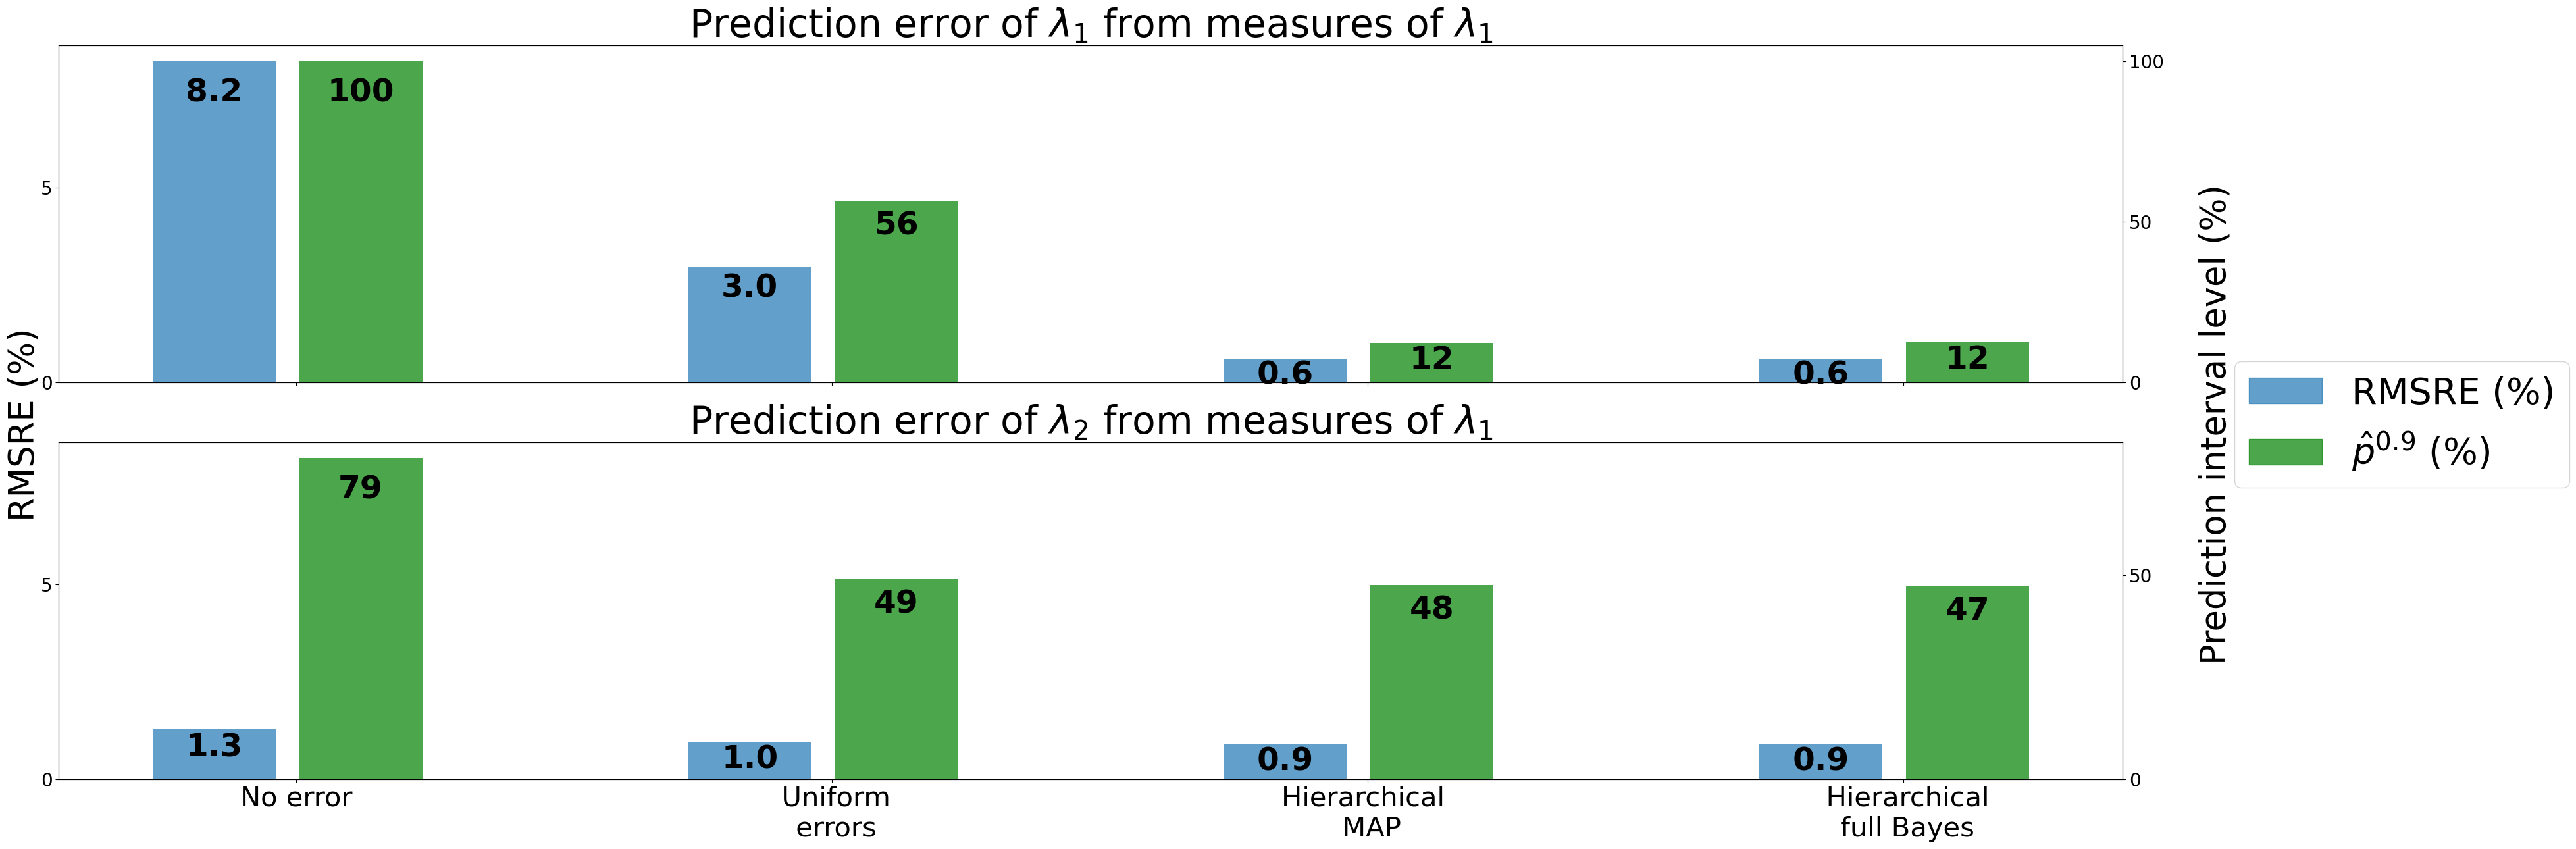

In [24]:
plot_errors(index_calib = 1, pre_path = pre_path, variable_names = variable_names, no_error = True, unif_error = True, hierarchical_map = True, full_bayes = True, embed = False, savefig = True, nb_outputs = nb_outputs)

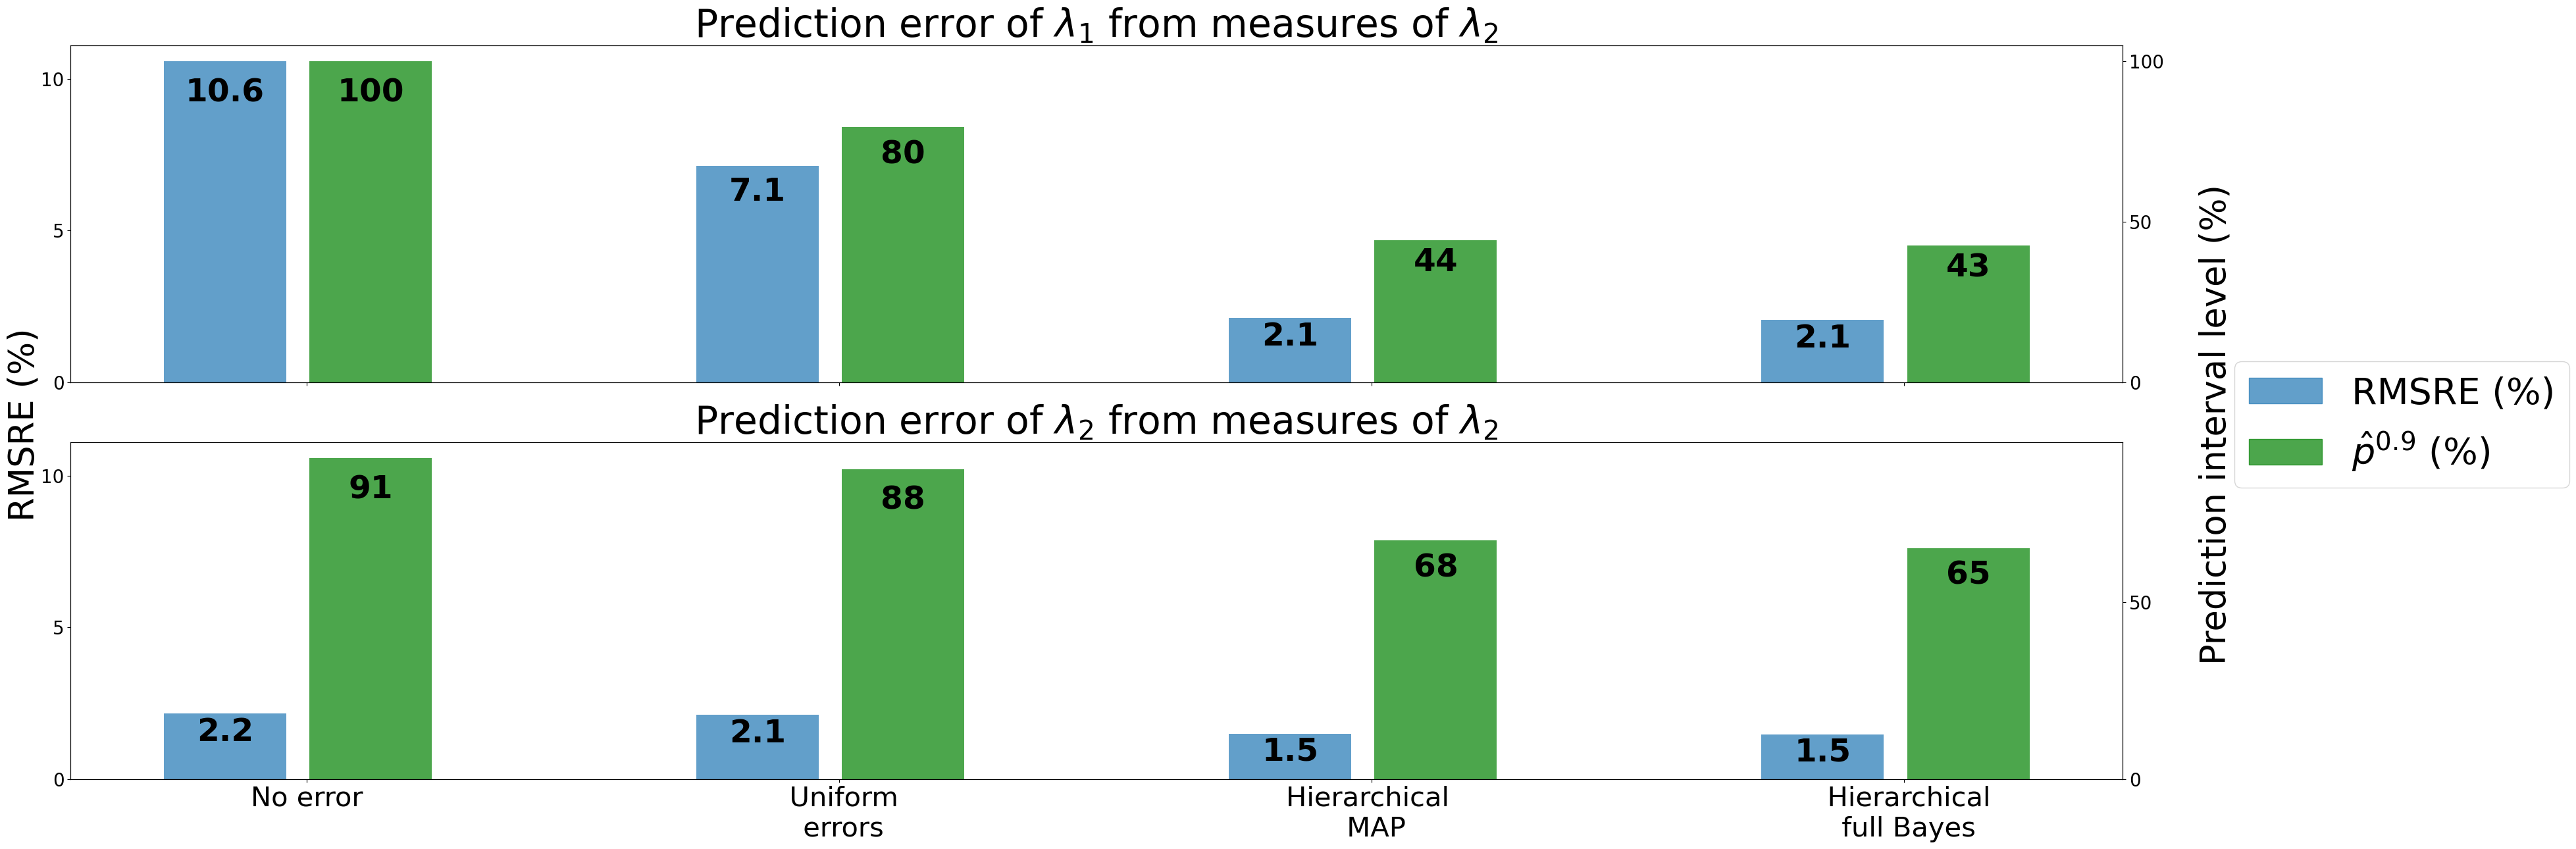

In [26]:
plot_errors(index_calib = 2, pre_path = pre_path, variable_names = variable_names, no_error = True, unif_error = True, hierarchical_map = True, full_bayes = True, embed = False, savefig = True, nb_outputs = nb_outputs)

# Below is the plot of an example of posterior sample obtained for $\Lambda$ 

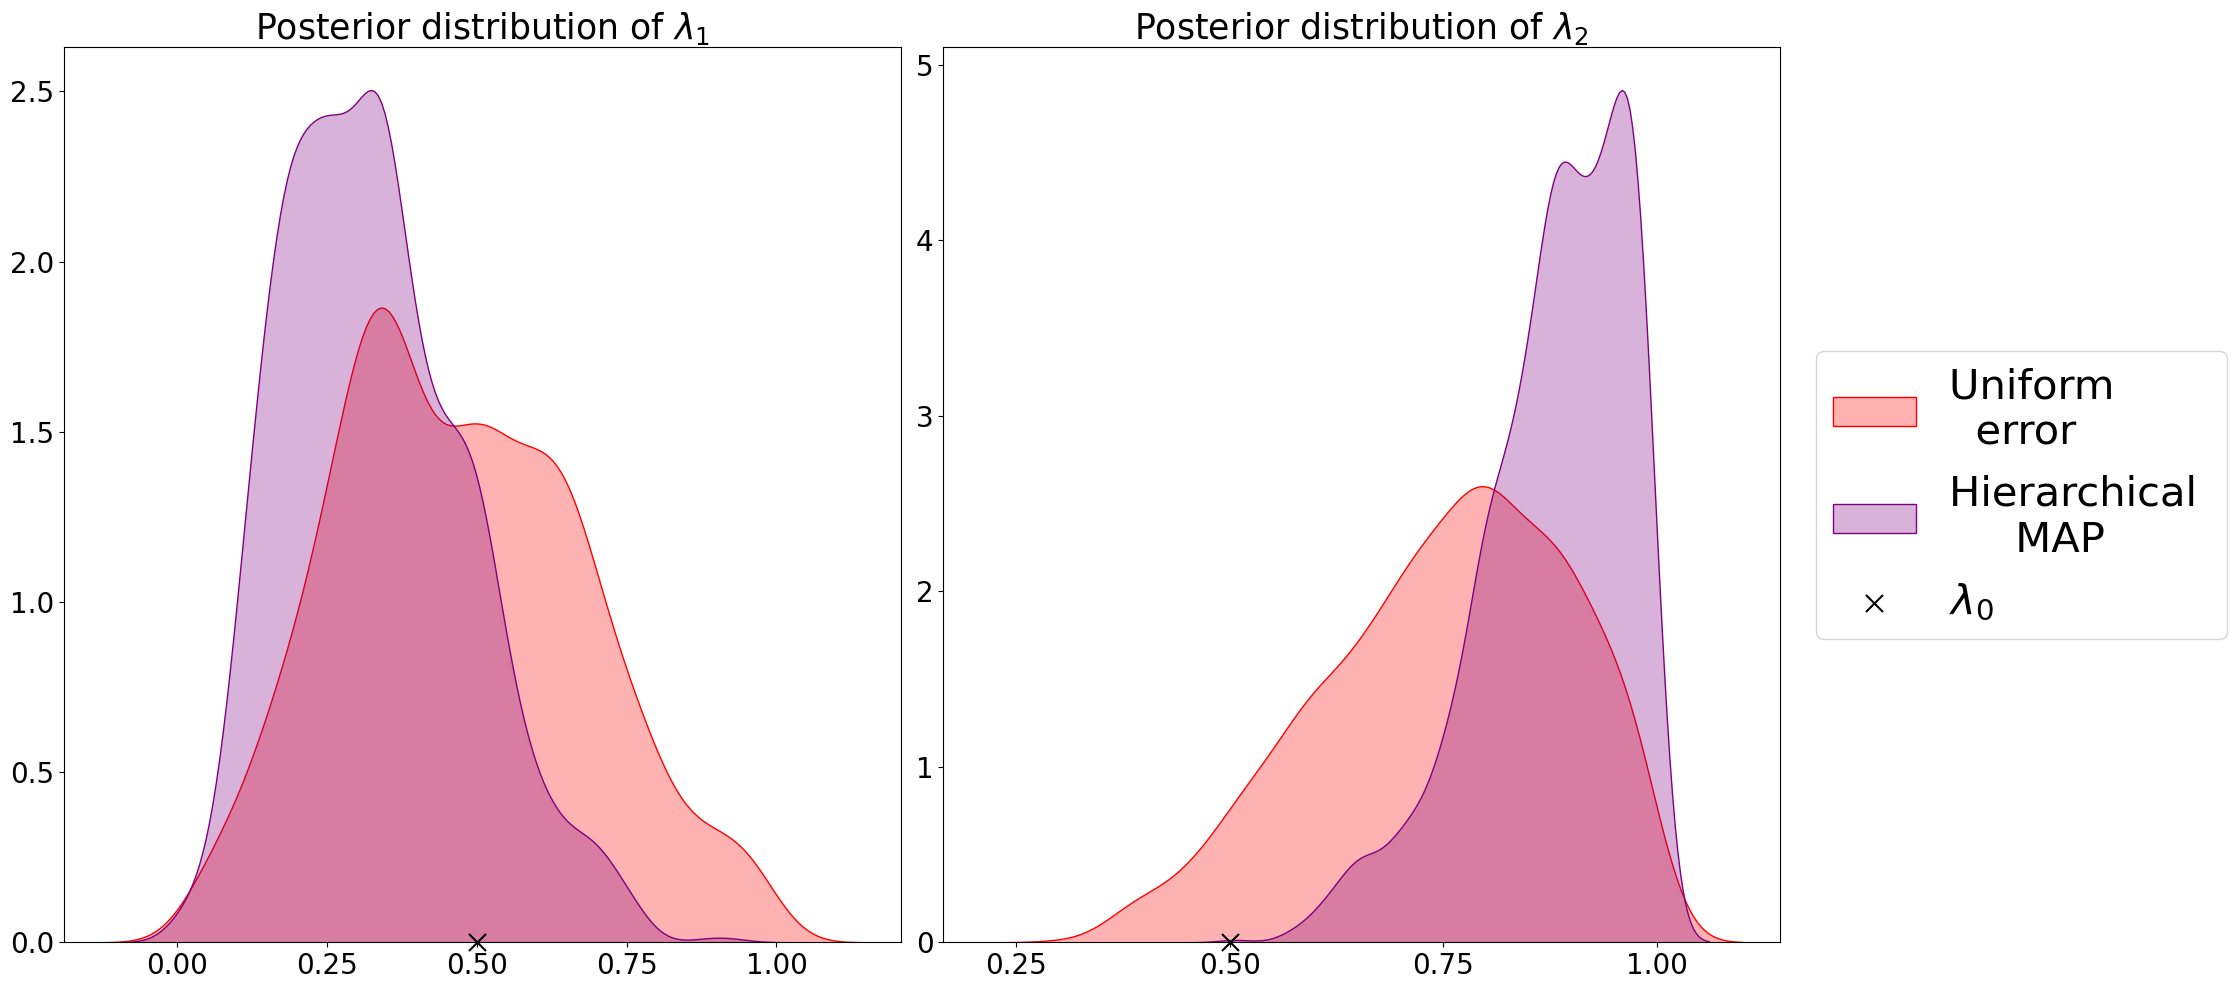

In [28]:
bMINlambda = np.array([0, 0]) #lower bounds
bMAXlambda = np.array([1, 1]) #upper bounds

lambda_0 = (np.array([0.5,0.5])-bMINlambda)/(bMAXlambda-bMINlambda) #lambda0 used for the measures

index_calib=1 #which calibration variable

sample_unif = pd.read_csv(pre_path + f"uniform_error/calib_{index_calib}/lambd_post.csv", index_col = 0).values #uniform error sample
sample_hier = pd.read_csv(pre_path + f"hierarchical_model/calib_{index_calib}/lambd_post.csv", index_col = 0).values #hierarchical model sample
sample_unif = np.apply_along_axis(lambda x:(x-bMINlambda)/(bMAXlambda-bMINlambda), 1, sample_unif) #normalized sample
sample_hier = np.apply_along_axis(lambda x:(x-bMINlambda)/(bMAXlambda-bMINlambda), 1, sample_hier) #normalized sample

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
axes = axes.flatten()

for i in range(2):
    kde_unif = sns.kdeplot(sample_unif[:, i], ax=axes[i], label='Uniform \n  error', color='red', fill=True, alpha=0.3)
    kde_hier = sns.kdeplot(sample_hier[:, i], ax=axes[i], label='Hierarchical \n     MAP', color='purple', fill=True, alpha=0.3)
    
    axes[i].set_xticks([0, 0.25, 0.5, 0.75, 1])
    axes[i].set_title(f'Posterior distribution of {variable_names[i]}', fontsize=25)
    axes[i].tick_params(axis='both', labelsize=20)
    axes[i].set_ylabel('')  # Supprimer le titre de l'axe Y
    axes[i].scatter(lambda_0[i], 0, color='black', marker='x', s=150, label=r'$\lambda_0$',clip_on=False)

handles, labels = axes[1].get_legend_handles_labels()  

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=30)

plt.tight_layout()

plt.savefig(pre_path + f"plots/compare_samples.jpg",bbox_inches='tight', format = "jpg")

plt.show()